# 规划模型

## 线性规划简介
在人们的生产实践中，经常会遇到如何利用现有资源来安排生产，以取得最大经济效益的问题。此类问题构成了运筹学的一个重要分支—数学规划，而**线性规划**(Linear Programming)则是数学规划的一个重要分支，也是一种十分常用的最优化模型。

而随着计算机的发展，线性规划的方法被应用于广泛的领域，已成为数学建模里最为经典，最为常用的模型之一。

线性规划模型可用于求解利润最大，成本最小，路径最短等最优化问题。

### 概念引入：一个典型的线性规划问题

```{admonition} 例题
某机床厂生产甲、乙两种机床，每台销售后的利润分别为**4千元**与**3千元**。

- 生产甲机床需用A、B机器加工，加工时间分别为每台2小时和1小时
- 生产乙机床需用A、B、C三种机器加工，加工时间为每台各一小时

若每天可用于加工的机器时数分别为**A机器10小时、B机器8小时和C机器7小时**

问该厂应生产甲、乙机床各几台，才能使总利润最大？
```

这个问题是一个十分典型的线性规划问题，首先对问题提取出关键信息：

- **决策**：生产几台甲、乙机床
- **优化目标**：总利润最大
- **约束**：生产机床的使用时间有限

将上诉三个要素写成数学表达式，就是一个典型的线性规划模型：

$$
\begin{aligned}
&\max \quad z= 4x_{1}+ 3x_{2}\\
&\text { s.t. }\left\{\begin{array}{l}
{2x_{1}+ x_{2} \leq 10} \\
{x_{1}+ x_{2} \leq 8} \\
{x_2  \leq 7}\\
{ x_{1}, x_{2} \geq 0}
\end{array}\right.
\end{aligned}
$$

### 线性规划模型的三要素


线性规划模型主要包括三个部分：决策变量、目标函数、约束条件

- **决策变量**
决策变量是指问题中可以改变的量，例如生产多少货物，选择哪条路径等；线性规划的目标就是找到最优的决策变量。在线性规划中决策变量包括实数变量，整数变量，0-1变量等。
-  **目标函数**
目标函数就是把问题中的决策目标量化，一般分为最大化目标函数$\max$和最小化目标函数$\min$
在线性规划中，目标函数为一个包含决策变量的线性函数，例如$\max x_1 + x_2$
- **约束条件**
约束条件是指问题中各种时间，空间，人力，物力等限制。
在线性规划中约束条件一般表示为一组包含决策变量的不等式，例如$x_1 + 2x_2 \leq 10 $或者$4x_1 + 3x_2 \leq 24$。此外，决策变量的取值范围称为符号约束，例如$x_1 \geq 0, x_2 \geq 0$。




```{admonition} 思考
什么是线性？
```







### 线性规划模型的标准形式

对于一个线性规划模型：

$$
\begin{aligned}
&\min \quad z= x_{1}+ x_{2}\\
&\text { s.t. }\left\{\begin{array}{l}
{x_{1}+2 x_{2} \leq 10} \\
{4 x_{1}+3 x_{2} \leq 24} \\
{ x_{1}, x_{2} \geq 0}
\end{array}\right.
\end{aligned}
$$


其中$s.t.$为subject to的缩写。上述模型可以写成如下的矩阵形式：

$$
\begin{aligned}
&\min c^{T} x\\
&\text { s.t. }\left\{\begin{array}{l}
{A x \leq b} \\
{ x \geq 0}
\end{array}\right.
\end{aligned}
$$



其中

$$
c = [1,1]^T
$$

$$
x= [x_1,x_2]^T
$$

$$
A = \left[ \begin{matrix}
1 & 2\\
4&3
\end{matrix}\right]
$$

$$
b = \left[\begin{matrix}10\\24 \end{matrix}   \right]
$$





``` {tip}
对于有 $n$ 个决策变量，$m$ 个约束的线性规划模型, $c,x$ 为 $n$ 维列向量，$b$ 为 $m$ 维列向量，$A$ 为 $m \times n$ 维矩阵。
```

线性规划的目标函数可能是最大化，也可能是最小化，约束条件的符号可能是小于等于，也可能是大于等于。甚至还有等于。因此为了编程方便，一般统一为**最小化目标函数，小于等于约束**。

最大化目标函数可以添加负号变为最小化约束：

$$
\max z = x_1 +  x_2 \implies \min -z = -x_1 - x_2
$$

大于等于约束可以两边乘以 $-1$ 变为小于等于约束：

$$
x_1 + 2x_2 \geq 10 \implies -x_1 - 2x_2 \leq -10
$$

等于约束可以变为一个大于等于约束和一个小于等于约束，**但在编程中一般支持直接写等式约束,可以不进行转换：**

$$
x_1 + 2x_2 = 10 \implies x_1 + 2x_2 \leq 10, x_1 + 2x_2 \geq 10
$$


综上，考虑了等式约束后的线性规划的标准形式可以写为：

```{admonition} 线性规划的标准形式

$$
\begin{aligned}
&\min c^{T} x\\
&\text { s.t. }\left\{\begin{array}{l}
{A x \leq b} \\
{ Aeq  \cdot x=b e q} \\
{l b \leq x \leq u b}
\end{array}\right.
\end{aligned}
$$
```

```{admonition} 课堂练习
请写出以下两个线性规划的标准型

 
$$
\begin{aligned}
&\min \quad z= 5x_{1}+ 4x_{2} + 6x_3\\
&\text { s.t. }\left\{\begin{array}{l}
{3x_{1}+2 x_{2} - x_3 \geq 10} \\
{4 x_{1}+3 x_{2} - 2x_3 \geq 24} \\
{ x_{1}+ x_{2}  + x_3 \leq 8} \\
{5x_{1}+2 x_{2}  =  10} \\
{2x_{2}+3 x_{3}  =  6} \\
{ x_{1}, x_{2},x_3 \geq 0}
\end{array}\right.
\end{aligned}
$$

$\quad$



$$
\begin{aligned}
&\max \quad z= x_{1}+ x_{2} + 3x_3 + 2x_4\\
&\text { s.t. }\left\{\begin{array}{l}
{3x_{1}+2 x_{2} - x_3 \geq 5} \\
{4 x_{1}+3 x_{2} - 2x_3 + x_4 \geq 12} \\
{ x_{1}+ x_{2}  + x_3 + x_4 \leq 7} \\
{5x_{1}+2 x_{2}  =  5} \\
{2x_{2}+3 x_{4}  =  4} \\
{ x_{1}, x_{2},x_3,x_4 \geq 0}
\end{array}\right.
\end{aligned}
$$
```



::::{admonition,dropdown,tip} 点击查看问题1答案

$$
c = [5,4,6]^T
$$

$$
x = [x_1,x_2,x_3]^T
$$

$$
A = \left[\begin{matrix} -3 & -2 & 1 \\ 
-4 & -3 & 2\\
1 & 1 & 1
\end{matrix} \right]
$$

$$
b = \left[\begin{matrix} -10 \\ 
-24 \\
8
\end{matrix} \right] 
$$

$$
Aeq = \left[\begin{matrix} 5 & 2 & 0 \\ 
0 & 2 & 3\\
\end{matrix} \right]
$$


$$
beq = \left[\begin{matrix} 5 \\ 
4 
\end{matrix} \right] 
$$

:::{admonition} 
问题2请大家课上自行完成
:::

::::



## 图解法和单纯形法


### 图解法


对于较为简单且只有两个决策变量的线性规划问题可以使用图解法。


例如考虑如下线性规划模型：


$$
\begin{aligned}
&z= x_{1}+ x_{2}\\
&\text { s.t. }\left\{\begin{array}{l}
{x_{1}+2 x_{2} \leq 10} \\
{4 x_{1}+3 x_{2} \leq 24} \\
{x_{1}, x_{2} \geq 0}
\end{array}\right.
\end{aligned}
$$

以决策变量 $x_1$ 为 $x$ 轴，决策变量 $x_2$ 为 $y$ 轴，可以将约束条件表示为如下所示的多边形，其中多边形的每一个边界即为一个约束条件，目标函数则为一条直线，优化目标为使该条直线在 $y$ 轴上的截距最大。

```{figure} ../_static/lecture_specific/lp/p1.svg
---
height: 450px
name: directive-fig
---

```

从图中可以看出，当目标函数经过多边形的顶点A(即表示两个约束条件的直线交点)时， $y$ 轴截距取得最大值。
即：**当$x_1 = 3.6, x_2 = 3.2$ 时，目标函数取得最大值为 $z = x_1 + x_2 = 3.6 +3.2 = 6.8$**

### 单纯形法



**对于决策变量比较多的线性规划模型，图解法不再适用。**
单纯形法是1947 年G. B. Dantzig提出的一种十分有效的求解方法，极大地推广了线性规划的应用，
直到今日也在一些线性规划的求解器中使用。

从图解法的例子中，我们可以看出，约束条件所围成的区域为一个**凸多边形**，当决策变量多于两个时，约束条件围城的区域为一个**凸多面体**，称之为**可行域**。其中每一个面（称之为**超平面**）即代表一个约束条件。

```{hint}
可以证明：线性规划的最优解一定在可行域的边界上
```
```{figure} https://cdn.kesci.com/upload/image/q0jgxmo90i.jpg?imageView2/0/
---
height: 400px
name: directive-fig2
---

```
单纯形法的思路就是在可行域的一个顶点处找到一个**初始可行解**，**判断该解是不是最优**，若不是，则**迭代到下一个顶点处**进行重复判断。因为最优解的搜索范围从整个可行域缩小到了可行域的有限个顶点，算法的效率得到了极大的提升。



```{figure} https://cdn.kesci.com/upload/image/q0jgyianss.png?imageView2/0
---
height: 400px
name: directive-fig3
---

```

**具体的找初始可行解的方法，判断解是否最优的条件，如何进行迭代这里不做详细展开，有兴趣的同学可以查阅相关资料。**


```{tip}
此外，求解线性规划的方法还有椭球法、卡玛卡算法、内点法等。
其中内点法因为求解效率更高，在决策变量多，约束多的情况下能取得更好的效果，目前主流线性规划求解器都是使用的内点法。
```

## 使用Python求解简单线性规划模型

使用python进行线性规划求解的 编程思路为

- **选择适当的决策变量**
在解决实际问题时，把问题归结成一个线性规划数学模型是很重要的一步，但往往也是困难的一步，模型建立得是否恰当，直接影响到求解。
而选适当的决策变量，是我们建立有效模型的关键之一。
- **将求解目标简化为求一个目标函数的最大/最小值**
能把要求解的问题简化为一个最值问题是能否使用线性规划模型的关键，如果这一点不能达到，之后的工作都有没有意义的。
- **根据实际要求写出约束条件（正负性，资源约束等）**
线性规划的约束条件针对不同的问题有不同的形式，总结来说有以下三种：等式约束、不等式约束、符号约束

```{admonition} 例题1
考虑如下线性规划问题

$$
\begin{aligned}
&\max z=2 x_{1}+3 x_{2}-5 x_{3}\\
&\text { s.t. }\left\{\begin{array}{l}
{x_{1}+x_{2}+x_{3}=7} \\
{2 x_{1}-5 x_{2}+x_{3} \geq 10} \\
{x_{1}+3 x_{2}+x_{3} \leq 12}\\
{x_{1}, x_{2}, x_{3} \geq 0}
\end{array}\right.
\end{aligned}
$$
```


**Step1: 导入相关库**

In [1]:
import numpy as np 
from scipy import optimize as op 

**Step2: 定义决策变量**

In [2]:
# 给出变量取值范围
x1=(0,7)  
x2=(0,7)
x3=(0,7)

**Step3: 将原问题化为标准形式**

$$
\begin{aligned}
&{\min -z=-2 x_{1}-3 x_{2}+5 x_{3}}\\
&\text { s.t. }\left\{\begin{array}{l}
{x_{1}+x_{2}+x_{3}=7} \\
{-2 x_{1}+5 x_{2}-x_{3} \leq -10} \\
{x_{1}+3 x_{2}+x_{3} \leq 12}\\
{x_{1}, x_{2}, x_{3} \geq 0}
\end{array}\right.
\end{aligned}
$$

```{warning}
注意：编程时默认为最小化目标函数，因此这里改为 $\min-z$；第二个约束为大于等于约束，这里化为小于等于约束
```


**Step4: 定义目标函数系数和约束条件系数**

In [3]:
c=np.array([-2,-3,5])   # 目标函数系数,3x1列向量
A=np.array([[-2,5,-1],[1,3,1]]) # 不等式约束系数A，2x3维矩阵
b=np.array([-10,12])  # 等式约束系数b, 2x1维列向量
A_eq=np.array([[1,1,1]])  # 等式约束系数Aeq，3x1维列向量
b_eq=np.array([7])   # 等式约束系数beq，1x1数值

**Step5: 求解**

In [4]:
res=op.linprog(c,A,b,A_eq,b_eq,bounds=(x1,x2,x3)) #调用函数进行求解
res

     con: array([1.19830323e-08])
     fun: -14.571428542312137
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-3.70230904e-08,  3.85714287e+00])
  status: 0
 success: True
       x: array([6.42857141e+00, 5.71428573e-01, 9.82192085e-10])

即当 $x_1 = 6.43, x_2 = 0.57, x_3 = 0$ 时，目标函数取得最大值 $z = 14.57$

```{admonition} 例题2


$$
\begin{array}{l}
&{\min z=2 x_{1}+3 x_{2}+x_{3}} \\
&\text { s.t. }{\quad\left\{\begin{array}{l}{x_{1}+4 x_{2}+2 x_{3} \geq 8} \\ {3 x_{1}+2 x_{2} \geq 6} \\ {x_{1}, x_{2}, x_{3} \geq 0}\end{array}\right.}\end{array}
$$
```

In [5]:
#导入相关库
import numpy as np
from scipy import optimize as op

#定义决策变量范围
x1=(0,None)
x2=(0,None)
x3=(0,None)

#定义目标函数系数
c=np.array([2,3,1]) 

#定义约束条件系数
A_ub=np.array([[-1,-4,-2],[-3,-2,0]])
B_ub=np.array([-10,-6])

#求解
res=op.linprog(c,A_ub,B_ub,bounds=(x1,x2,x3))
res

     con: array([], dtype=float64)
     fun: 8.000000000000306
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 8.81072992e-13, -2.70006240e-13])
  status: 0
 success: True
       x: array([0.91155217, 1.63267174, 1.27888043])

即当 $x_1 = 0.8, x_2 = 1.8, x_3 = 0$ 时，目标函数取得最小值 $z = 7$

## 使用Python求解包含非线性项的规划问题

```{tip} 
- 规划问题的分类
  - **线性规划**： 在一组线性约束条件的限制下，求一线性目标函数最大或最小的问题；
  - **整数规划**：当约束条件加强，要求所有的自变量必须是整数时，成为整数规划（特别地，自变量只能为0或1时称为0-1规划）；
  - **非线性规划**：无论是约束条件还是目标函数出现非线性项，那么规划问题就变成了非线性规划；
  - **多目标规划**：在一组约束条件的限制下，求多个目标函数最大或最小的问题；
  - **动态规划**：将优化目标函数分多阶段，利用阶段间的关系逐一进行求解的方法；
```


有的时候，我们还需要求解包含了非线性项的非线性规划问题。事实上，针对非线性规划，没有一个统一的理论。这里仅提供一种可行的求解思路。

今后在讲优化算法的时候，会介绍如何使用现代优化算法求解非线性规划问题。

``` {admonition} 例题3
求解如下规划问题

$$
\begin{array}{l}
&{\min f(x)=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}+8} \\
&\text { s.t. }{\quad\left\{\begin{array}{l}{x_{1}^{2}-x_{2}+x_{3}^{2} \geq 0} \\ {x_{1}+x_{2}^{2}+x_{3}^{3} \leq 20} \\ {-x_{1}-x_{2}^{2}+2=0}\\
 {x_{2}+2 x_{3}^{2}=3}\\
 {x_{1}, x_{2}, x_{3} \geq 0}
\end{array}\right.}\end{array}
$$
```

由于存在非线性项，不能沿用例一中的linprog函数求解，这里使用自定义函数的方法编写目标函数和约束条件，并使用scipy.optimize中的minimize函数求解。

**Step1:导入相关库**

In [6]:
import numpy as np
from scipy.optimize import minimize

**Step2:使用函数的形式表示目标和约束**

In [7]:
# 定义目标函数
def objective(x):
    return x[0] ** 2 + x[1]**2 + x[2]**2 +8

# 定义约束条件
def constraint1(x):
    return x[0] ** 2 - x[1] + x[2]**2  # 不等约束

def constraint2(x):
    return -(x[0] + x[1]**2 + x[2]**2-20)  # 不等约束

def constraint3(x):
    return -x[0] - x[1]**2 + 2        # 等式约束

def constraint4(x):
    return x[1] + 2*x[2]**2 -3           # 等式约束

注意：每一个函数的输入为一个 $n$维列向量 $x$，其中 $x[0]$表示该列向量的第一个元素，即 $x_1$。

**Step3:定义约束条件**

In [8]:
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'eq', 'fun': constraint3}
con4 = {'type': 'eq', 'fun': constraint4}

# 4个约束条件
cons = ([con1, con2, con3,con4])  

# 决策变量的符号约束
b = (0.0, None) #即决策变量的取值范围为大于等于0
bnds = (b, b ,b) 

注意：每一个约束为一个字典，其中 `type` 表示约束类型：`ineq`为大于等于，`eq`为等于； `fun` 表示约束函数表达式，即step2中的自定义函数。

**Step4:求解**

In [9]:
x0=np.array([0, 0, 0]) #定义初始值
solution = minimize(objective, x0, method='SLSQP', \
                    bounds=bnds, constraints=cons)

注意：minimize为最小化目标函数，且约束条件中默认为大于等于约束。

**Step5：打印求解结果**

In [10]:
x = solution.x

print('目标值: ' + str(objective(x)))
print('最优解为')
print('x1 = ' + str(round(x[0],2)))
print('x2 = ' + str(round(x[1],2)))
print('x3 = ' + str(round(x[2],2)))
solution

目标值: 10.651091840572583
最优解为
x1 = 0.55
x2 = 1.2
x3 = 0.95


     fun: 10.651091840572583
     jac: array([1.10433471, 2.40651834, 1.89564812])
 message: 'Optimization terminated successfully'
    nfev: 71
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.55216734, 1.20325918, 0.94782404])

即当 $x_1 = 0.55, x_2 = 1.2, x_3 = 0.95$ 时，目标函数取得最小值 $z = 10.65$

## 从整数规划到0-1规划

```{attention}
本节为拓展内容，仅做了解，不要求掌握
```



### 整数规划模型

规划中的变量（部分或全部）限制为整数时，称为整数规划。若在线性规划模型中，变量限制为整数，则称为整数线性规划。

**当决策变量均为整数时，称纯整数规划；**

**当决策变量中部分为整数，部分为实数时，称混合整数规划；**
    
一般用 $x , integer$ 表示 $x$ 为整数

将第一节中的线性规划图解法的例子添加整数约束，则可行域变为了多边形内的整点，如下图所示：


![Image Name](https://cdn.kesci.com/upload/image/q0jh5t5e59.png?imageView2/0/w/500/h/500)


可以看出，可行域变成了离散的点，这也使得整数规划问题比线性规划问题要更难求解，但现实中的许多决策变量都只能取整数，因此混合整数规划问题也成为了了研究最多的线性规划问题。

**注意：整数规划最优解不能按照实数最优解简单取整而获得**，但简单取整后，再进行邻域搜索不失为一种有用的解法。

整数规划的两个常用求解方法：
- 分支定界算法
- 割平面法

**分枝定界法**

- **step1**不考虑整数约束的情况下求解得到最优解 $x^*$（一般不是整数）；

- **step2**以该解的上下整数界限建立新的约束，将原整数规划问题变为两个问题（**分枝**）；

- **step3**分别对两个子问题求解（不考虑整数约束），若解刚好为整数解则结束；若不为整数解则继续进行分枝；

- **step4**以最开始的目标函数值作为上界，子问题求解中得到的任一整数解为下界（**定界**），对子问题进行剪枝，减小问题规模；

- **step5**重复以上步骤直到得到最优解

**割平面法**

- **step1**不考虑整数约束的情况下求解得到最优解 $x^*$（一般不是整数）；

- **step2**过该解做一个割平面（二维情况下为一条直线），缩小可行域；

- **step3**在缩小后的可行域中求最优解（不考虑整数约束）

- **step4**重复步骤2和步骤3，直到最优解满足整数约束

**由于模型求解可以直接使用求解器（主要是Lingo），这里仅提供求解思路，如果在比赛中遇到该类问题，可以再查阅相关资料。**

### 0-1规划模型

当整数规划问题中的整数型决策变量限制为只能取0或1时，称为0-1整数规划，简称为0-1规划。

因为0-1规划问题的解空间比一般的整数规划问题较少，求解起来较为容易，且所有的整数规划问题都可以化为0-1规划问题，所以在建立混合整数规划模型求解实际问题时，应尽量使用0-1决策变量进行建模。

**例如**：有十个工厂可供决策时，可以使用10个0-1变量，当取值为0时时代表不使用这个工厂，取值为1时使用该工厂。


0-1规划的常用求解方法：**分支定界算法、割平面法、隐枚举法**

```{admonition} **0-1规划应用举例** : 指派问题
拟分配$n$个人去做$n$项工作，每人干且仅干一项工作，若分配第$i$人去干第$j$项工作，需花费$c_{ij}$时间，问应该如何分配工作才能使工人们总的花费时间最少？
```

**解：** 引入变量$x_{ij}$，若分配$i$做第$j$项工作，则取$x_{ij} =1$，否则$x_{ij} = 0$，上述指派问题的数学模型为：


$$
\begin{aligned}
&{\min \quad \sum_{i=1}^{n} \sum_{j=1}^{n} c_{i j} x_{i j}}\\
s.t.&\left\{\begin{array}{ll}
{\displaystyle\sum_{j=1}^{n} x_{i j}=1} \\
{\displaystyle\sum_{i=1}^{n} x_{i j}=1} \\
{x_{i j}=0 或 1}
\end{array}\right.
\end{aligned}
$$

## 案例分析


``` {admonition} 案例1：投资的收益和风险

市场上有$n$种资产$s_i(i = 1,2,\cdots,n)$可以选择，现用数额为$M$的相当大的资金作一个时期的投资。购买这$n$种资产的收益率为$r_i$，风险损失率为$q_i$,投资越分散，总的风险越少，总体风险可以用投资$s_i$中最大的一个风险来度量。

此外，购买$s_i$时还要付交易费（费率为$p_i$），当购买额不超过给定值$u_i$时，交易费按购买额$u_i$计算。另外，假定同期银行存款利率为$r_0$，既无交易费又无风险（$r_0 = 5\%$）。已知$n=4$时相关数据如下表


$$
\begin{array}{|c|c|c|c|c|}\hline s_{i} & {r_{i}(\%)} & {q_{i}} & {p_{i}(\%)} & {u_{i}(\text{RMB})} \\ 
\hline s_{1} & {28} & {2.5} & {1} & {103} \\ 
\hline s_{2} & {21} & {1.5} & {2} & {198} \\ 
\hline s_{3} & {23} & {5.5} & {4.5} & {52} \\ 
\hline s_{4} & {25} & {2.6} & {6.5} & {40} \\ 
\hline\end{array}
$$


试给该公司设计一种投资组合方案，用给定的资金$M$，有选择地购买若干种资产或者银行生息，**使净收益最大，总体风险最小**。

```





符号规定

- $s_i$  :第$i$种投资项目，如股票、债券
- $r_i,p_i,q_i$：分别为$s_i$的平均收益率，交易费率，风险损失率
- $u_i$ : $s_i$的交易定额
- $r_0$ :同期银行利率
- $x_i$ : 投资项目$s_i$的资金
- $a$ : 投资风险度
- $Q$ ： 总体收益



模型假设：
1. 投资数额M相当大，为了便于计算，假设$M=1$
1. 投资越分散，总风险越小，总体风险用投资项目$s_i$中最大的一个风险来度量
1. $n$种资产$s_i$之间是相互独立的
1. 在投资的这一时期内，$r_i,p_i,q_i,r_0$为定值



### 建立与简化模型


根据模型假设和符号规定，我们可以写出模型的第一个优化目标为总体风险尽可能小,而总体风险是所有投资中风险最大的一个

$$
\min \max \{q_ix_i | i=1,2,...n\}
$$

第二个优化目标为净收益尽可能大。根据题意，交易费用为一个分段函数（非线性函数），因此需要进行简化：由于题目给定的定值 $u_i$ 相对于总投资额 $M$ 很小，可以忽略不计，因此将交易费简化为 $p_i x_i$,所以目标函数为

$$
\max \sum_{i=1}^n (r_i - p_i) x_i 
$$


**对于一个多目标优化模型，常用的考虑方式为先固定其中一个目标，再优化另一个目标。**

在本题中，可以给定一个投资者能够承受的风险界限 $a$,使得最大投资风险下损失比例小于 $a$,即 $\dfrac{q_i x_i}{M} < a$，将其作为新的约束，就可以把多目标优化转化为单目标优化，即：

$$
\begin{aligned}
&{\max \sum_{i=1}^n (r_i - p_i) x_i }\\
s.t.&\left\{\begin{array}{ll}
{\dfrac{q_i x_i}{M} < a } \\
{\displaystyle\sum_{i=1}^n (1+p_i)x_i = M} \\
{x_i \geq 0, i=1,2,...n}
\end{array}\right.
\end{aligned}
$$


### 使用python scipy库求解
$a$ 反映了投资者对风险的偏好程度，从 $a = 0$ 开始，以步长为0.001进行循环搜索，使用python编写代码如下

Text(0, 0.5, 'Profit')

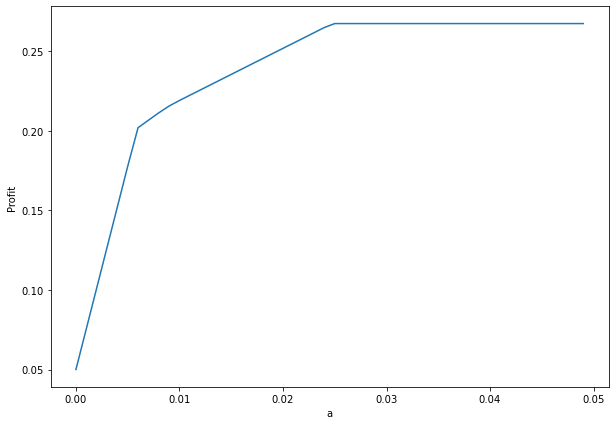

In [11]:
#导入相关库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as op

#定义a的取值
a = 0
profit_list = [] #记录最大收益
a_list = [] #记录a的取值


while a<0.05:
    #定义决策变量取值范围
    x1=(0,None)

    #定义目标函数系数
    c=np.array([-0.05,-0.27,-0.19,-0.185,-0.185]) 
    #定义不等式约束条件左边系数
    A = np.hstack((np.zeros((4,1)),np.diag([0.025,0.015,0.055,0.026])))
    #定义不等式约束条件右边系数
    b=a*np.ones((4,1));
    #定义等式约束条件左边系数
    Aeq=np.array([[1,1.01,1.02,1.045,1.065]])
    #定义等式约束条件右边系数
    beq=np.array([1]);
    #求解
    res=op.linprog(c,A,b,Aeq,beq,bounds=(x1,x1,x1,x1,x1))
    profit = -res.fun
    profit_list.append(profit)
    a_list.append(a)
    a = a+0.001

#绘制风险偏好a与最大收益的曲线图    
plt.figure(figsize=(10,7))
plt.plot(a_list,profit_list)
plt.xlabel('a');plt.ylabel('Profit')

**从上图中可以看出**

1. 风险越大，收益也就越大；
2. 当投资越分散时，投资者承担的风险越小，这与题意一致。即：
冒险的投资者会出现集中投资的情况，保守的投资者则尽量分散投资。
3. 在 $a=0.006$ 附近有一个转折点，在这点左边，风险增加很少时，利润增长很快。在这一点右边，风险增加很大时，利润增长很缓慢，所以对于风险和收益没有特殊偏好的投资者来说，应该选择曲线的拐点作为最优投资组合，大约是 $a=0.6\%$，总体收益为 $Q=20\%$，所对应投资方案为：风险度 $a = 0.006$，收益 $Q = 0.2019$，$x_0=0，x_1=0.24，x_2=0.4，x_3=0.1091, x_4=0.2212$

**模型求解的其他思路**

在上面的例子中，我们使用固定风险水平来最大化收益的方法来将多目标转化为单目标，也可考虑其他思路：

1.在总盈利在水平 $k$ 以上的情况下，寻找风险最低的投资方案，即：

$$
\begin{aligned}
&{\min \left\{ \max {q_i x_i} \right\}}\\
\text{s.t.} & {\left\{ \begin{array}{l}
{\displaystyle\sum_{i=1}^n (r_i - p_i) x_i \geq k}\\
{ \displaystyle\sum_{i=1}^n (1+p_i)x_i = M}\\
{ x_i \geq 0, i=1,2,...n}
\end{array} \right.}
\end{aligned}
$$

2.对风险和收益赋予权重 $s(0 \leq s \leq 1)$ 和 $1-s$, $s$成为投资偏好系数，即


$$
\begin{aligned}
& {\min \quad s\max \{q_ix_i\} - (1-s)\sum_{i=1}^n (r_i - p_i) x_i } \\
\text{s.t.}&\left\{\begin{array}{l}
{\displaystyle \sum_{i=1}^n (1+p_i)x_i = M }\\
{  x_i \geq 0, i=1,2,...n}
\end{array}\right.
\end{aligned}
$$

``` {admonition} 案例2：运输问题(产销平衡)
某商品有$m$个产地，$n$个销地，各产地的产量分别为$a_1,a_2,\cdots,a_m$，各销地的需求量分别为$b_1,b_2,\cdots,b_n$。若该商品由$i$地运到$j$地的单位运价为$c_{ij}$，问应该如何调运才能使总运费最省？
```

**解：** 引入变量$x_{ij}$，其取值为由$i$地运往$j$地的商品数量，数学模型为

$$
\begin{aligned}
&\min \sum_{i=1}^{m} \sum_{j=1}^{n} c_{i j} x_{i j}\\
s.t.&\left\{\begin{array}{ll}
{\displaystyle \sum_{j=1}^{n} x_{i j}=a_{i},} & {i=1, \cdots, m} \\
{\displaystyle \sum_{i=1}^{m} x_{i j}=b_{j},} & {j=1,2, \cdots, n} \\
{x_{i j} \geq 0}
\end{array}\right.
\end{aligned}
$$

## 练习作业

``` {admonition} 作业1：
- 请使用Python `scipy`库 的`optimize.linprog`方法，求解以下线性规划问题,并通过图解法验证。

$$
\begin{array}{l}
&{\max z= 4x_{1}+ 3x_{2}} \\
&\text { s.t. }{\quad\left\{\begin{array}{l}
{2x_{1}+ x_{2} \leq 10} \\ 
{x_{1}+ x_{2} \leq 8} \\ 
{x_{1}, x_{2} \geq 0}
\end{array}\right.}\end{array}
$$
```

``` {admonition} 作业2：
- 请使用Python `scipy`库 的`optimize.minimize`方法，求解以下非线性规划问题


$$
\begin{array}{l}
&{\min z= x_{1}^2 + x_{2}^2 +x_{3}^2} \\
&\text { s.t. }{\quad\left\{\begin{array}{l}
{x_1+x_2 + x_3\geq9 } \\ 
{ x_{1}, x_{2},x_3 \geq 0}
\end{array}\right.}\end{array}
$$
```


``` {admonition} 作业3：

- 某农场 I,II,III 等耕地的面积分别为 $100 hm^2$、$300 hm^2$ 和 $200 hm^2$，计划种植水稻、大豆和玉米，要求三种作物的最低收获量分别为$190000kg$、$130000kg$和$350000kg$。I,II,III 等耕地种植三种作物的单产如下表所示。
若三种作物的售价分别为水稻1.20元/kg，大豆1.50元/kg，玉米0.80元/kg。那么，
	- 如何制订种植计划才能使总产量最大？
	- 如何制订种植计划才能使总产值最大？
**要求：写出规划问题的标准型，并合理采用本课程学到的知识，进行求解。**


|         | I等耕地 | II等耕地| III等耕地 |
| :--------:| :--------: | :--------: | :--------: |
| 水稻     | 11000     | 9500     |  9000|
| 大豆     | 8000     | 6800     |  6000|
| 玉米     | 14000     | 12000     |  10000|

```